# BL40A2010 Introduction to IoT-Based Systems

## Tutorial 5: *Probability theory*

## Author: Pedro Nardelli

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import poisson
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

## Experiments using random variables

Let us make a computer experiment to simulate when someone throws a coin.

### Defining the function of throwing the coin

In [2]:
def flip(p):
    return 'H' if np.random.random() < p else 'T'

In this case $p$ is the probability of being Head, so that Tail is $1-p$. If $p=0.5=50\%$, this is a fair coin, otherwise is a biased coin.

- Experiment 1: 1 trial
- Experiment 2: 10 trials
- Experiment 3: 10000 trials
- Get from experiment 3 the frequency that H and T appears
- Compare this with the *bias* probability

In [3]:
### Experiment 1
p=0.3
flip(p)

'H'

In [4]:
### Experiment 2 - 10 trials

a = [None] * 10 #create an empty list with 10 elements
for i in range(10):
    a[i]=flip(p)
print(a)

['H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']


In [5]:
### Experiment 3 - Empirical probability based on frequency

#Number o realizations
x_max = 10000
count = 0
#Experiment
for x in range(0, x_max):
    a = flip(p)
    #print a
    if a == 'H':
        count = count + 1
print('Number of heads:', count)
print('Number of tails:', x_max - count)

Number of heads: 2918
Number of tails: 7082


In [6]:
#Probability from experiments: Number of Heads or Tails diveded by the number of realizations
print('Empirical frequency')
print('Probability (heads):', count / x_max)
print('Probability (tails):', (x_max-count) / x_max)
print('Bias probability')
print('Probability (heads):', p)
print('Probability (tails):', 1-p)

Empirical frequency
Probability (heads): 0.2918
Probability (tails): 0.7082
Bias probability
Probability (heads): 0.3
Probability (tails): 0.7


### Try yourself:
- set $p=0.85$ and $p=0.05$
- run the experiments and check what happens

## Generate Poisson random variables

- Not explaining what is a Poisson random variable now
- The idea is that during a fixed period of time, discrete events happens
- The number of events in each period is independent
- The only parameter needed is the expected value of how many packets will arrive in a given period
- First experiment: We will generante an array with 10 numbers with mean of 4 packets per period.
- Second experiment: Array with 10000 with means 2 and 4 and draw a histogram

### Empirical analysis based on [computer experiments](http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/numpy-html-1.14.0/reference/generated/numpy.random.poisson.html)

In [7]:
#Simulating Poisson distribution with mean 4
mean=4
samples = np.random.poisson(mean, 10)
print(samples)

[4 5 5 7 2 5 7 7 4 5]


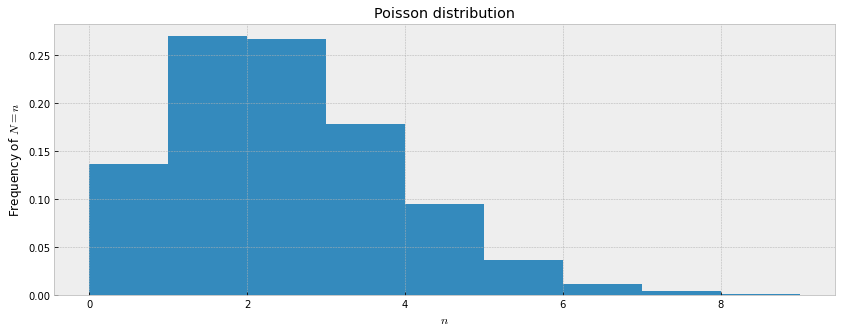

In [10]:
### Drawing a histogram (empirical distribution)
## https://matplotlib.org/3.1.1/gallery/statistics/hist.html#
mean=2
samples_mean2 = np.random.poisson(mean, 10000)
n_bins2 = np.max(samples_mean2) - np.min(samples_mean2)
##
plt.figure(figsize=(14,5))
plt.hist(samples_mean2,n_bins2,density=True)
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show() 

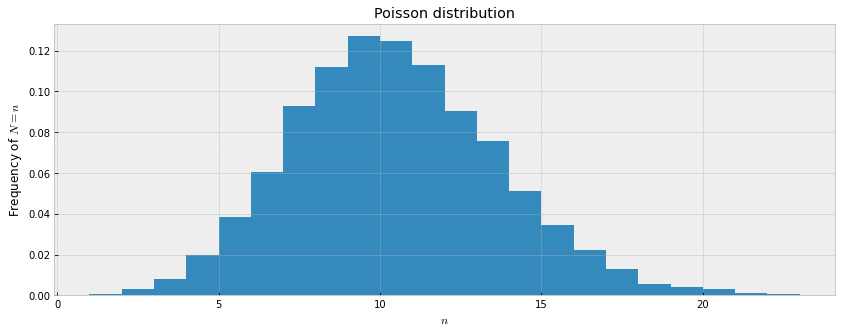

In [11]:
mean=10
samples_mean10 = np.random.poisson(mean, 10000)
n_bins10 = np.max(samples_mean10) - np.min(samples_mean10)
##
plt.figure(figsize=(14,5))
plt.hist(samples_mean10,n_bins10,density=True)
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show()

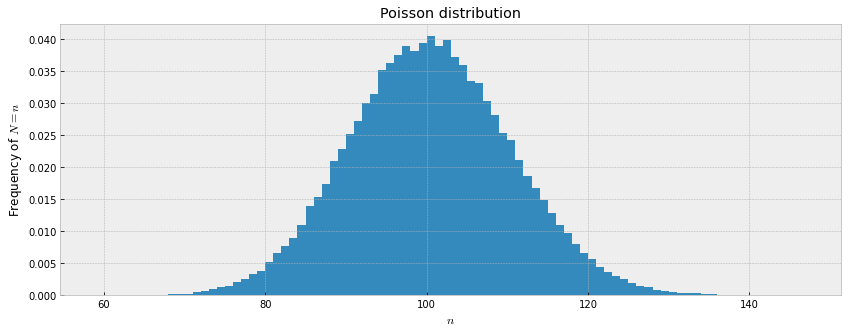

In [12]:
mean=100
samples_mean100 = np.random.poisson(mean, 100000)
n_bins100 = np.max(samples_mean100) - np.min(samples_mean100)
##
plt.figure(figsize=(14,5))
plt.hist(samples_mean100,n_bins100,density=True)
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show()

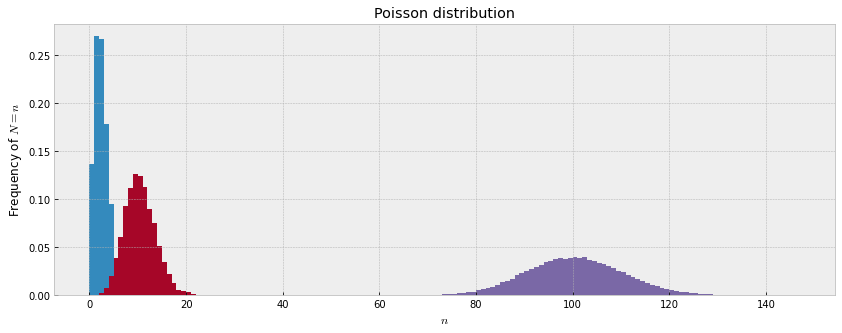

In [13]:
plt.figure(figsize=(14,5))
plt.hist(samples_mean2,n_bins2,density=True)
plt.hist(samples_mean10,n_bins10,density=True)
plt.hist(samples_mean100,n_bins100,density=True)
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show() 

### Analytical distribution (from [mathematical formula](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html))

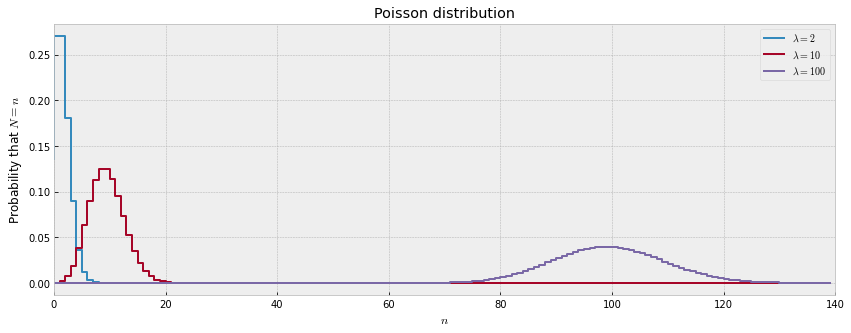

In [14]:
##
n = np.arange(140)
plt.figure(figsize=(14,5))
plt.step(n, poisson.pmf(n, 2), where='pre', label='$\lambda=2$')
plt.step(n, poisson.pmf(n, 10), where='pre', label='$\lambda=10$')
plt.step(n, poisson.pmf(n, 100), where='pre', label='$\lambda=100$')
plt.xlabel('$n$')
plt.ylabel('Probability that $N = n$')
plt.title('Poisson distribution')
#plt.ylim([0, 1])
plt.xlim([0, 140])
plt.grid(True) #grid
plt.legend()
plt.show() 

### Matching empirical and analytical (formula)

Try yourself with different values

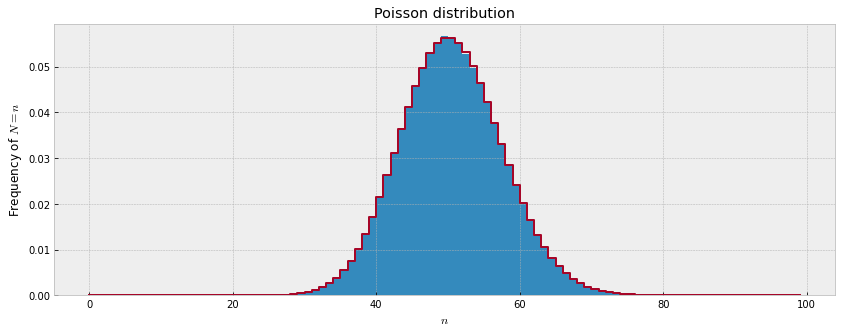

In [16]:
meanX=50
n_samples = 1000000
n = np.arange(2*meanX)
####
samples_meanX = np.random.poisson(meanX, n_samples)
n_binsX = np.max(samples_meanX) - np.min(samples_meanX)
##
plt.figure(figsize=(14,5))
plt.hist(samples_meanX,n_binsX,density=True)
plt.step(n, poisson.pmf(n, meanX), where='post')
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show() 

## Example of simple (naive) queue

- Persons arrive in a queue to be served following a Poisson distribution with mean $\lambda$ in a given period of time (like when you go to have lunch and need to wait)
- Persons that have arrived are served following a rate that follows a Poisson distribution with mean $\mu$
- Can you tell what is the worst case in relation to delay?

### Case 1: Arrivals smaller than service rate

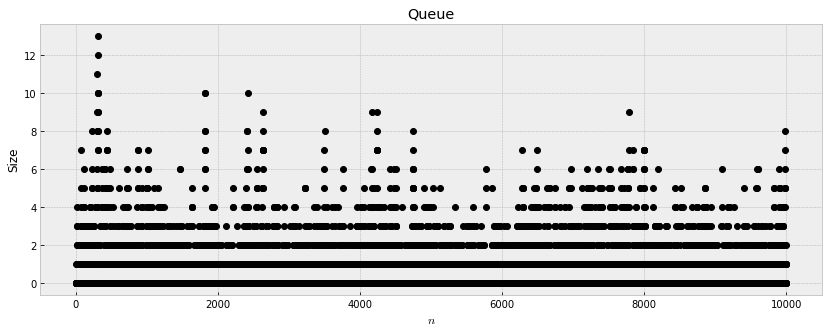

Worst delay: 13.0


In [17]:
#time periods
size=10000
#Arrival (persons per minute)
mean=1
arrival = np.random.poisson(mean, size)
#Service (persons per minute)
mean=2
service = np.random.poisson(mean, size)
#
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])



plt.figure(figsize=(14,5))
#plt.plot( arrival, 'o',label='Arrival')
#plt.plot( service, 'x',label='Sevice')
plt.plot( queue, 'ok')
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
#plt.ylim([0, 1])
#plt.xlim([0, 10])
plt.grid(True) #grid
plt.show() 

print('Worst delay:', np.max(queue))

### Case 2: Arrivals greater than service rate

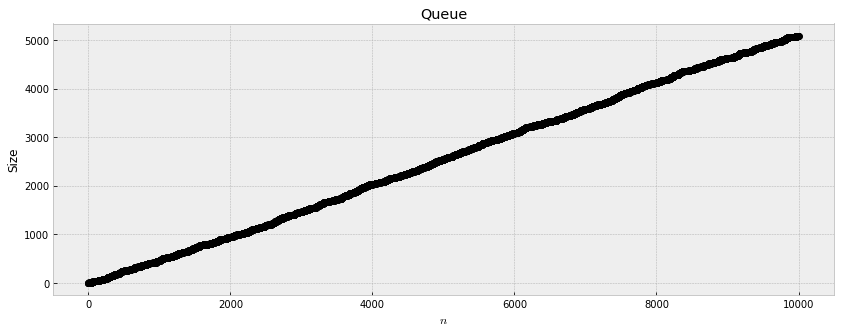

Worst delay: 5086.0


In [18]:
#time periods
size=10000
#Arrival
mean=1.5
arrival = np.random.poisson(mean, size)
#Service
mean=1
service = np.random.poisson(mean, size)
#
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])



plt.figure(figsize=(14,5))
#plt.plot( arrival, '--o',label='Arrival')
#plt.plot( service, '-x',label='Sevice')
plt.plot( queue, 'ok')
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
#plt.ylim([0, 1])
#plt.xlim([0, 10])
plt.grid(True) #grid
plt.show() 

print('Worst delay:', np.max(queue))

### Case 3: Arrivals equal to service rate

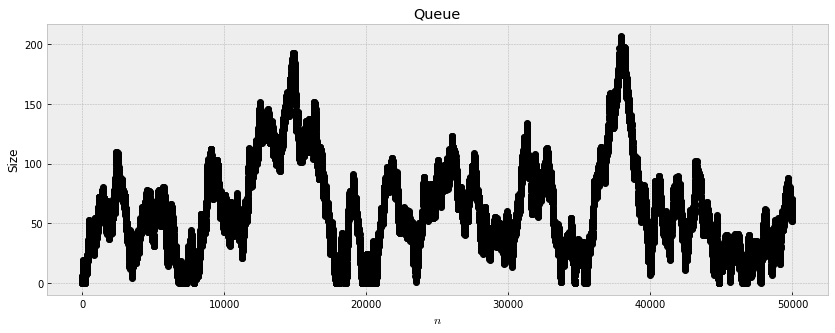

Worst delay: 207.0


In [19]:
#time periods
size=50000
#Arrival
mean=1
arrival = np.random.poisson(mean, size)
#Service
mean=1
service = np.random.poisson(mean, size)
#
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])



plt.figure(figsize=(14,5))
#plt.plot( arrival, '--o',label='Arrival')
#plt.plot( service, '-x',label='Sevice')
plt.plot( queue, 'ok')
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
#plt.ylim([0, 1])
#plt.xlim([0, 10])
plt.grid(True) #grid
plt.show() 

print('Worst delay:', np.max(queue))

### Try yourself as follows:
- $\lambda = 1$ and $\mu = 1.1$
- $\lambda = 1.1$ and $\mu = 1$

## To think about

What if:
- The queue has a maximum value (overflow)?
- There are more than 1 queue (e.g., one for picking the food, other to pay)?